In [119]:
#Load the data
import pandas as pd

Dataset=pd.read_excel("/Users/alinahasan/Desktop/intrnshp/housing.xlsx")
Dataset
xcol=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
x=Dataset[xcol]

y=Dataset['median_house_value']


In [120]:
print(Dataset.head(10))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   
5    -122.25     37.85                  52          919           213.0   
6    -122.25     37.84                  52         2535           489.0   
7    -122.25     37.84                  52         3104           687.0   
8    -122.26     37.84                  42         2555           665.0   
9    -122.25     37.84                  52         3549           707.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401   

In [121]:
#Handle missing values
Dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [122]:
Dataset.total_bedrooms=Dataset.total_bedrooms.fillna(Dataset.total_bedrooms.mean())
Dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [123]:
#Encode categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Dataset['ocean_proximity']=le.fit_transform(Dataset['ocean_proximity'])
print(Dataset)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  ocean

In [124]:
#Standardize data
from sklearn.preprocessing import StandardScaler
names = Dataset.columns

scaler = StandardScaler()

scaled_df = scaler.fit_transform(Dataset)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,1.291089,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.291089,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.291089,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.291089,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.291089,1.172900


In [125]:
xcol=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
x=scaled_df[xcol]

y=scaled_df['median_house_value']


In [126]:
#Split the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16512, 9)
(16512,)
(4128, 9)
(4128,)


In [127]:
print(x_train)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16943  -1.367766  0.898047            1.856182    -0.795651       -0.846428   
1018   -1.108218  0.954229           -0.209729    -0.216708       -0.474341   
18821  -0.673974  1.839102            1.538349    -0.623298       -0.586444   
4428    0.673679 -0.721879            0.902685    -0.712683       -0.610296   
6813    0.748549 -0.717197           -0.050812    -0.898330       -0.860739   
...          ...       ...                 ...          ...             ...   
13838   1.132879 -0.515877            0.743768    -0.455070       -0.116565   
7127    0.738566 -0.754652           -0.050812    -0.298760       -0.536356   
543    -1.352792  1.005730            1.697265    -0.526578       -0.553052   
16150  -1.452618  1.005730            1.856182     0.188506        0.245982   
14457   1.147853 -1.316476            0.505394     0.124790        0.136264   

       population  households  median_income  ocean

In [128]:
#Perform Linear Regression
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_predict = linreg.predict(x_test)
print(y_predict)

[ 0.08879852  0.53691638  2.78885709 ... -0.58642904 -1.17655059
 -0.12796286]


In [129]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.6060817389797248
0.6390936315522757


In [130]:
#Perform Linear Regression with one independent variable
X_train=x_train[['median_income']]
X_test=x_test[['median_income']]

linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_predict = linreg.predict(X_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.7333307287898939
0.4716375872691647


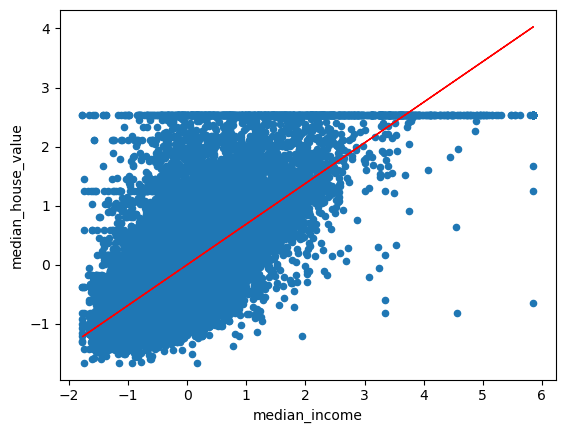

In [131]:
import matplotlib.pyplot as plt
scaleddf.plot(kind='scatter',x='median_income',y='median_house_value')
plt.plot(X_test,y_predict,c='red',linewidth=1)